<a href="https://colab.research.google.com/github/56sarager/Graphene-Classification/blob/main/Graphene_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#General function to unzip zip file
#Zip file of images downloaded from Google Drive (NEW DATA 10/16) and uploaded to colab
import zipfile
import os

def unzip_file(zip_path, extract_to):
    # Ensure the target extraction directory exists
    os.makedirs(extract_to, exist_ok=True)

    # Open the zip file and extract its contents
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    print(f"Extracted all files to {extract_to}")

zip_file_path = '/content/16-20241027T153146Z-001.zip'
extraction_directory = 'folder'
unzip_file(zip_file_path, extraction_directory)

Extracted all files to Graphene Clean Dataset


In [ ]:
#Function to move and rename images (1.jpg, 2.jpg, ...) from uploaded folder to new folder
#Used to combine 05212024, 08272024, 05312024, 08012024, and 05282024 folders which had already been sorted by hand with the uploaded zip file
import os
import shutil

def move_and_rename_images(source_dir, target_dir):
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    # Initialize counter for renaming images
    image_counter = 30

    # Walk through all subdirectories and files in the source directory
    for root, _, files in os.walk(source_dir):
        for file in files:
            # Check if the file is an image (optional: you can add more formats)
            if file.lower().endswith(('10x.png', '10x.jpg', '10x.jpeg', '10x.gif', '10x.bmp', '10x.tiff')):
                # Define the new filename with sequential numbering
                new_filename = f"{image_counter}.jpg"
                # Define full paths for source and target files
                src_path = os.path.join(root, file)
                dest_path = os.path.join(target_dir, new_filename)

                # Move and rename the image file
                shutil.move(src_path, dest_path)

                # Increment the counter for the next image
                image_counter += 1

    print(f"Moved and renamed {image_counter - 1} images to {target_dir}.")


source_directory = 'folder2'
target_directory = 'folder3'
move_and_rename_images(source_directory, target_directory)


Moved and renamed 88 images to folder3.


In [ ]:
#Function to create zip folder and download it to computer to save progress
import shutil

def zip_folder(folder_path, zip_path):
    shutil.make_archive(zip_path, 'zip', folder_path)
    print(f"Folder zipped as {zip_path}.zip")

# Example usage
folder_to_zip = '/content/Graphene Clean Dataset/Graphene Clean Dataset/resized_images'
zip_file_path = 'zipfolder'  # No .zip extension needed
zip_folder(folder_to_zip, zip_file_path)

from google.colab import files

# Downloads the zip file
files.download(zip_file_path + '.zip')


Folder zipped as zipfolder.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

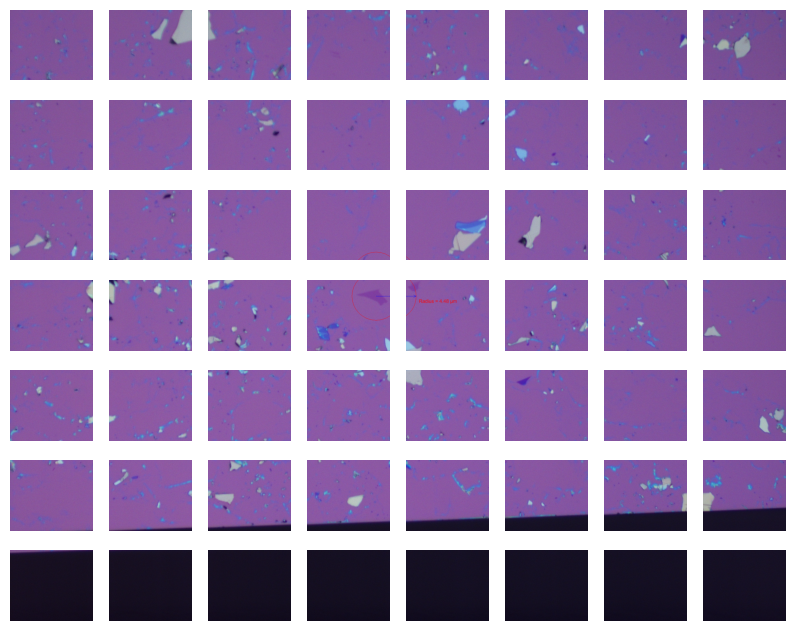

In [ ]:
#Function to break an image into 56 sections
import cv2
import matplotlib.pyplot as plt

def split_image_into_56_sections(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image at {image_path}")
        return []

    # Get image dimensions
    height, width, _ = image.shape

    # Calculate the width and height of each section
    section_height = height // 7
    section_width = width // 8

    # List to store the 56 sections
    sections = []

    # Loop through each row and column to slice the sections
    for i in range(7):
        for j in range(8):
            # Calculate the start and end points for each section
            y_start = i * section_height
            y_end = (i + 1) * section_height
            x_start = j * section_width
            x_end = (j + 1) * section_width

            # Slice the section from the image
            section = image[y_start:y_end, x_start:x_end]
            sections.append(section)

    return sections

# Example usage
image_path = '/content/folder3/1.jpg'
sections = split_image_into_56_sections(image_path)

# Display the 56 sections using matplotlib
if sections:
    plt.figure(figsize=(10, 8))
    for idx, section in enumerate(sections):
        plt.subplot(7, 8, idx + 1)
        plt.imshow(cv2.cvtColor(section, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

In [ ]:
#Function to split every image in a folder into 56 sections
import cv2
import os

def split_image_into_56_sections(image_path, output_folder, base_filename):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image at {image_path}")
        return

    # Get image dimensions
    height, width, _ = image.shape

    # Calculate the width and height of each section
    section_height = height // 7
    section_width = width // 8

    # Loop through each row and column to slice the sections
    section_counter = 1  # Initialize section counter
    for i in range(7):
        for j in range(8):
            # Calculate the start and end points for each section
            y_start = i * section_height
            y_end = (i + 1) * section_height
            x_start = j * section_width
            x_end = (j + 1) * section_width

            # Slice the section from the image
            section = image[y_start:y_end, x_start:x_end]

            # Save the section to the output folder
            section_filename = os.path.join(output_folder, f"{base_filename}_{section_counter}.jpg")
            cv2.imwrite(section_filename, section)
            section_counter += 1

def process_images_in_folder(input_folder, output_folder):
    # Ensure the output directory exists
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_folder, filename)
            # Use the filename without extension as base for saving sections
            base_filename = os.path.splitext(filename)[0]
            split_image_into_56_sections(image_path, output_folder, base_filename)

# Example usage
input_folder = '/content/folder3'
output_folder = '/content/folder4'
process_images_in_folder(input_folder, output_folder)

In [ ]:
#Function to sequentially rename files (1.png, 2.png, ...)
import os

def rename_files_sequentially(folder_path):
    # List all files in the directory
    files = os.listdir(folder_path)

    # Loop through each file and rename it
    for index, filename in enumerate(files, start=1):
        # Get the full path of the original file
        old_file_path = os.path.join(folder_path, filename)

        # Get the file extension
        file_extension = os.path.splitext(filename)[1]

        # Create the new file name
        new_file_name = f"{index}{file_extension}"
        new_file_path = os.path.join(folder_path, new_file_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)

    print(f"Renamed {len(files)} files in '{folder_path}'.")

# Example usage
folder_path = '/content/folder4'
rename_files_sequentially(folder_path)


Renamed 4928 files in '/content/folder4'.


In [ ]:
#Code to delete 'bad' images determined by inspecting all images by hand.
#'bad' images are ones with labeling that obscures the image
delete_list = [3344, 1990, 969, 1327, 726, 455, 170, 4615, 2133, 190, 503, 4928, 201, 3381, 4241, 2925, 2706, 113, 1647, 3093, 5,
               1050, 1549, 1074, 4807, 4749, 3223, 1935, 151, 4285, 4447, 1338, 1634, 2652, 3510, 4459, 4096, 1295, 4481, 4220, 500,
               2016, 3713, 3300, 304, 3203, 913, 4605, 2487, 3774, 4506, 180, 2881, 175, 1229, 1947, 1428, 2579, 2296, 3400, 3340, 2884,
               1071, 4018, 467, 2367, 1329, 1292, 213, 4667, 1370, 267, 1382, 176, 1652]

import os

def delete_files_in_folder(folder_path, delete_list):
    # Loop through each file in the delete list
    for filename in delete_list:
        # Create the full path to the file
        file_path = os.path.join(folder_path, str(filename)+'.jpg')

        # Check if the file exists and delete it
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {filename}")
        else:
            print(f"File not found: {filename}")

# Example usage
folder_path = '/content/folder4'
delete_files_in_folder(folder_path, delete_list)


Deleted: 3344
Deleted: 1990
Deleted: 969
Deleted: 1327
Deleted: 726
Deleted: 455
Deleted: 170
Deleted: 4615
Deleted: 2133
Deleted: 190
Deleted: 503
Deleted: 4928
Deleted: 201
Deleted: 3381
Deleted: 4241
Deleted: 2925
Deleted: 2706
Deleted: 113
Deleted: 1647
Deleted: 3093
Deleted: 5
Deleted: 1050
Deleted: 1549
Deleted: 1074
Deleted: 4807
Deleted: 4749
Deleted: 3223
Deleted: 1935
Deleted: 151
Deleted: 4285
Deleted: 4447
Deleted: 1338
Deleted: 1634
Deleted: 2652
Deleted: 3510
Deleted: 4459
Deleted: 4096
Deleted: 1295
Deleted: 4481
Deleted: 4220
Deleted: 500
Deleted: 2016
Deleted: 3713
Deleted: 3300
Deleted: 304
Deleted: 3203
Deleted: 913
Deleted: 4605
Deleted: 2487
Deleted: 3774
Deleted: 4506
Deleted: 180
Deleted: 2881
Deleted: 175
Deleted: 1229
Deleted: 1947
Deleted: 1428
Deleted: 2579
Deleted: 2296
Deleted: 3400
Deleted: 3340
Deleted: 2884
Deleted: 1071
Deleted: 4018
Deleted: 467
Deleted: 2367
Deleted: 1329
Deleted: 1292
Deleted: 213
Deleted: 4667
Deleted: 1370
Deleted: 267
Deleted: 138

edit_list=[1905, 1821, 3275, 2862, 4922, 3135, 4442, 4634, 176, 335, 1347, 1099, 1781, 4248, 857, 1197, 1252, 3967, 554, 4223, 4573, 4065, 4336, 3960, 4472, 32, 3956, 4725, 3916, 360, 1757, 1567, 2329, 667, 4183, 1823, 106, 286, 3261, 2122, 1659, 1592, 1880, 1115, 2570, 4308, 504, 2248, 2863, 557, 2632, 494, 1668, 1078]

edit_list files were cropped to remove annoations. The difference between files that were cropped and those that were deleted is that the cropped files had annotations on less than a quarter of the image.

flakes=[1260, 2370, 4370, 4755, 2723, 795, 1090, 2784, 2485, 1332, 774, 3635, 2381, 4582, 3555, 69, 3937, 2553, 2069, 4267, 1016, 3230, 2690, 1004, 1786, 1033, 1766, 1272, 2985, 186, 3374, 2044, 3256, 3287, 3794, 1002, 1560, 3191, 394, 1749, 1831, 1652, 2801, 2437, 749, 4735, 492, 1546, 2195, 4172, 502, 91, 88, 2773, 4078, 4374]

flakes files are images that contain graphene flakes. They were manually cropped into regions inside the red bounding circle indentifying the flakes and outside the red bounding circle identifying the flakes. The images of the graphene flakes were then saved as the integer name + 'f.jpg' to denote the presence flakes.

In [ ]:
#Convert all images in clean dataset to 640x640

import os
from PIL import Image

folder_path = '/content/Graphene Clean Dataset/Graphene Clean Dataset'

# Create a new folder to save resized images
resized_folder_path = os.path.join(folder_path, 'resized_images')
os.makedirs(resized_folder_path, exist_ok=True)

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Check for image file extensions
        image_path = os.path.join(folder_path, filename)
        with Image.open(image_path) as img:
            # Resize the image
            img_resized = img.resize((640, 640))
            # Save the resized image to the new folder
            img_resized.save(os.path.join(resized_folder_path, filename))

print(f'Resized images saved to: {resized_folder_path}')


Resized images saved to: /content/Graphene Clean Dataset/Graphene Clean Dataset/resized_images
